In [15]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat
from scipy.optimize import minimize
from scipy.special import expit 

import sys
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [16]:
# Ingresar imágenes de dígitos de 20x20
input_layer_size  = 10

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 10

data = loadmat(os.path.join('Datasets', 'ex3data1.mat'))
X = data['X']
y = data['y'].ravel()
y[y == 10] = 0

m = y.size
print(m)
print(X, '\n', y)

miArray = X # Creamos un array de 0 a 9 separados de uno en uno
yArray = y
ydim = yArray.ndim
numdim = miArray.ndim

Xnd = miArray.data
Ynd = yArray.data

byteX = miArray.itemsize
byteY = yArray.itemsize
print('\n','\n')
print(type(miArray))
print(numdim," Numero/s de Dimenciones")
print(byteX," Numero/s totales de elementos en el array")
print(Xnd," Numero/s de Buffer de Elementos en el array")



print(type(yArray))
print(ydim," Numero/s de Dimenciones")
print(byteY," Numero/s totales de elementos en el array")
print(Ynd," Numero/s de Buffer de Elementos en el array")

5000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 [0 0 0 ... 9 9 9]

 

<class 'numpy.ndarray'>
2  Numero/s de Dimenciones
8  Numero/s totales de elementos en el array
<memory at 0x000001E4EC0C5048>  Numero/s de Buffer de Elementos en el array
<class 'numpy.ndarray'>
1  Numero/s de Dimenciones
1  Numero/s totales de elementos en el array
<memory at 0x000001E4EBD19948>  Numero/s de Buffer de Elementos en el array


In [17]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

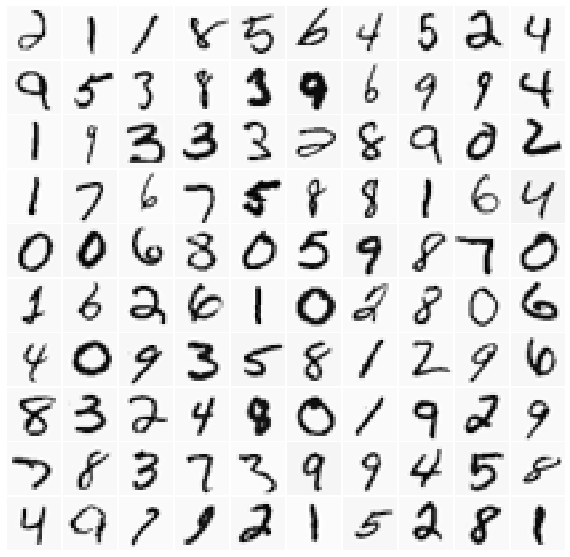

In [18]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [19]:
from sklearn.linear_model import LinearRegression 
regresion_multiple = LinearRegression()
regresion_multiple.fit(X,y)
print('theta = ' + str(regresion_multiple.coef_) + ', b = ' + str(regresion_multiple.intercept_))

theta = [ 5.53922342e-01 -7.83157589e+00  6.27623402e+05  6.39502329e+04
  2.73308197e+03  2.63607514e+02  2.75326033e+01 -9.01340457e+00
  2.45019708e+01 -8.13910759e+01 -5.83211536e+00 -3.07486665e+02
  2.51223482e+01 -3.34821406e+02  7.39682270e+02  1.07265140e+03
  3.69826134e+04  3.42058944e+05  4.18315658e+06  3.79751526e-01
 -3.82772895e+07  1.07296310e+06  8.76506251e+04  8.92843015e+03
  4.14940910e+02  4.55996776e+01  2.27664197e+00 -6.86153929e-02
  5.92665721e+00 -8.25878900e+00  3.11967807e+01 -1.68174103e+01
  1.07540816e-01 -3.01873101e+01  5.49244766e+01 -7.30872259e+01
  1.73118683e+02 -6.90131156e+01  7.82830039e+02 -3.53730565e+03
 -9.60180363e+06 -4.63108267e+05 -3.80499922e+04 -3.88450400e+03
 -2.12525292e+02 -1.39999128e+01 -3.58911399e+00  2.47903177e+00
 -3.38866570e+00  2.34221723e+00 -1.61344266e+00  3.34974931e+00
  4.30521901e-03 -7.12297581e-01  1.55818427e+00 -2.52068082e+00
  3.57386385e+00 -7.65595122e+00  5.51504230e+00 -1.01637759e+02
 -1.00731739e+06 

In [20]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_multiple.predict(X)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
# calculamos el coeficiente de determinación R2
r2 = regresion_multiple.score(X, y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Error Cuadrático Medio (MSE) = 2.8334090262362697
Raíz del Error Cuadrático Medio (RMSE) = 1.6832733070527406
Coeficiente de Determinación R2 = 0.6565564816683309


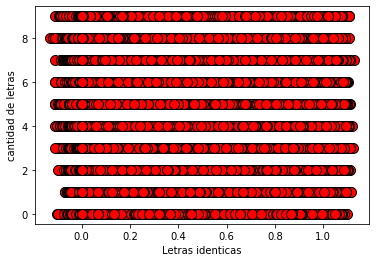

In [21]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('cantidad de letras')
    pyplot.xlabel('Letras identicas')
plotData(X, y)

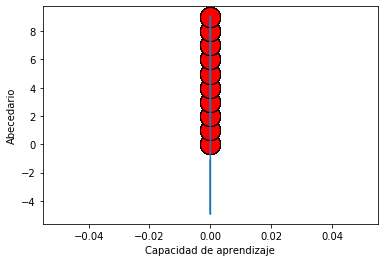

In [22]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=20, mec='k')
    pyplot.ylabel('Abecedario')
    pyplot.xlabel('Capacidad de aprendizaje')
plotData(X[:, :2], y)
pyplot.plot(X[:, 1], np.dot(X, regresion_multiple.coef_), '-')

Costo         : 2.534819
Costo esperadot: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]
(5000, 400)
Precision del conjuto de entrenamiento: 95.18%
(1, 400)
(1, 401)
[8]


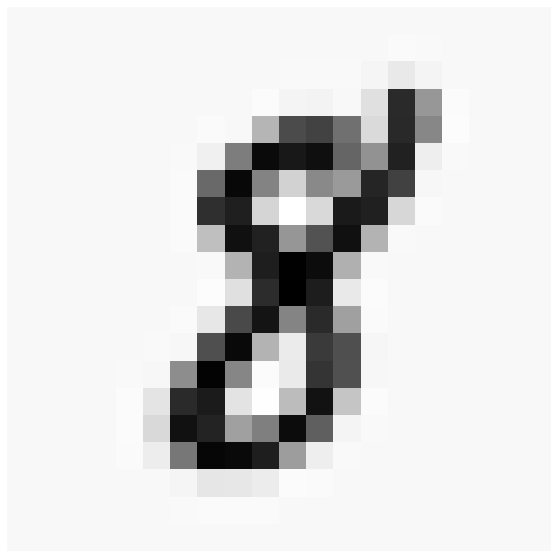

In [23]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))
def lrCostFunction(theta, X, y, lambda_):
# Inicializa algunos valores utiles
    m = y.size
    
    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)
    
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(X.dot(theta.T))
    
    temp = theta
    temp[0] = 0
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    
    grad = (1 / m) * (h - y).dot(X) 
    grad = grad + (lambda_ / m) * temp

    return J, grad
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperadot: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='CG',
                                options=options) 
        
        all_theta[c] = res.x

    return all_theta
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[4002:4003, :].copy()
print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((1, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

displayData(X[4002:4003, :])